## Health Expectancy

In [ ]:
# Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
# Loading the healthexp Dataset

In [10]:
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [11]:
# Check for the Shape of the Dataframe
df.shape

(274, 4)

In [13]:
# Check for Null values
df.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [15]:
# Check unique countries
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In [17]:
# Minimum & maximum spending overall
df['Spending_USD'].min(), df['Spending_USD'].max()

(123.993, 11859.179)

In [20]:
# Country with highest life expectancy in 2020
df[df['Year']==2020].sort_values('Life_Expectancy', ascending=False).head(1)

,Year,Country,Spending_USD,Life_Expectancy
272,2020,Japan,4665.641,84.7


In [21]:
# Average life expectancy by country
df.groupby('Country')['Life_Expectancy'].mean()


Country
Canada           78.706818
France           79.565714
Germany          76.726000
Great Britain    77.620930
Japan            79.554902
USA              75.843137
Name: Life_Expectancy, dtype: float64

In [23]:
# Life expectancy gained per $1000 spent (efficiency)
df['Efficiency'] = df['Life_Expectancy'] / df['Spending_USD']
df.groupby('Country')['Efficiency'].mean().sort_values(ascending=False)

Country
Japan            0.102949
Great Britain    0.087458
Germany          0.058850
France           0.046174
USA              0.045782
Canada           0.045226
Name: Efficiency, dtype: float64

In [24]:
# Countries with highest spending but lower life expectancy
df.sort_values(['Spending_USD','Life_Expectancy'], ascending=[False,True]).head()

,Year,Country,Spending_USD,Life_Expectancy,Efficiency
273,2020,USA,11859.179,77.0,0.006493
267,2019,USA,10855.517,78.8,0.007259
261,2018,USA,10451.386,78.7,0.007530
255,2017,USA,10046.472,78.6,0.007824
249,2016,USA,9717.649,78.7,0.008099


In [32]:
# Life expectancy growth from 1970 to 2020
life_growth = df.groupby('Country')['Life_Expectancy'].agg(['first','last'])
life_growth['last'] - life_growth['first']

Country
Canada            8.9
France           10.1
Germany          10.5
Great Britain     8.5
Japan            12.7
USA               6.1
dtype: float64

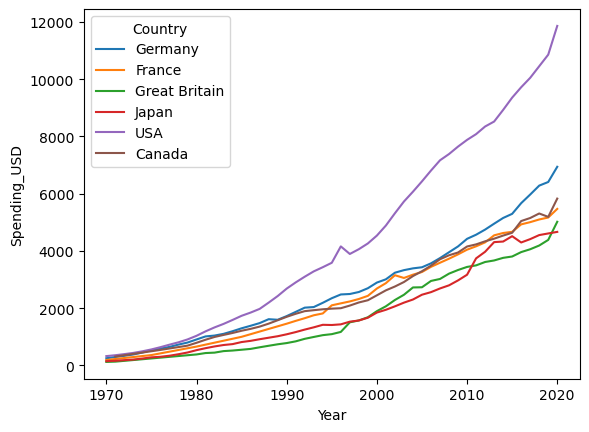

In [28]:
# Spending over years per country
sns.lineplot(data=df, x='Year', y='Spending_USD', hue='Country')
plt.show()

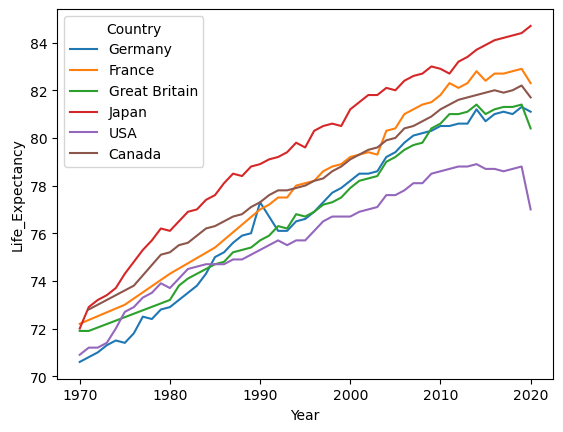

In [29]:
# Life expectancy over years per country
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()